# Two-spot ladybird sizes

### The question

<div>
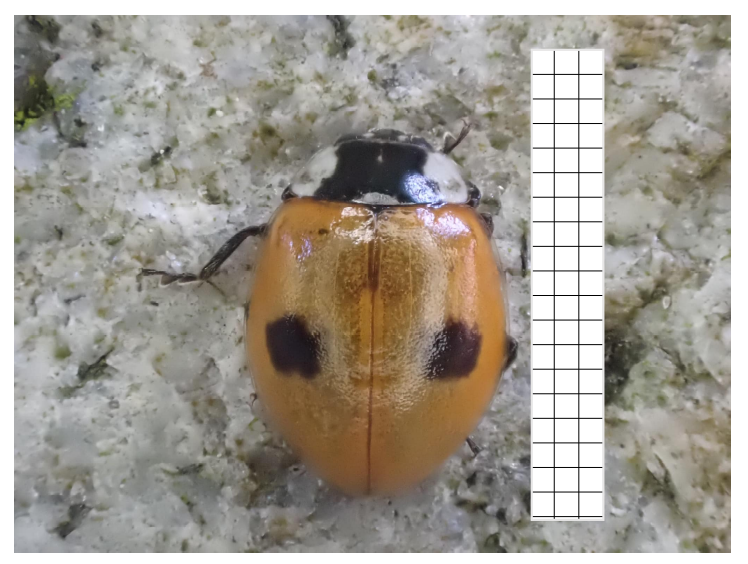
</div>

In Variation 1A last year you asked the question, "Do Harlequin ladybirds prefer to eat small two-spot ladybirds?". Your group and another group measured the sizes of two-spot ladybirds in two Edinburgh cemeteries, one with a low Harlequin predation rate and one with a high Harlequin predation rate. You then tested whether the difference in population mean ladybird sizes between the two cemeteries were the same or different.

Let's revisit one of the datasets collected last year.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

### Load and print the data

First we read in the dataset and print it to see how it looks and what the variable names, types and values are.

In [2]:
ladybirds = pd.read_csv('../Datasets/ladybird_sizes.csv')
ladybirds

,predation,size
0,high,5.00
1,high,5.50
2,high,5.00
3,high,5.25
4,high,4.75
5,high,5.50
6,high,5.25
7,high,5.00
8,high,4.75
9,high,4.50


Variable names are "predation" and "size". The variable "predation" is categorical with two levels "low" and "high" representing the two cemeteries with low and high predation rates. The variable "size" is a continuous numerical variable with units of mm. Fifty-three two-spot ladybird sizes have been measured to the nearest quarter of a millimetre.

Next we need to identify the explanatory (independent) and response (dependent) variables. In this case it very simple. Predation rate explains ladybird size. So "predation" is the explanatory variable and "size" is the response variable. 

### Plot the data

Now lets plot the data in a seaborn swarm plot. A swarm plot is a good one here because it shows the distribution of the individual data points. A boxplot could also be used but it doesn't show individual data points and so is harder to interpret.

The explanatory variable goes on the horizontal *x*-axis and the response variable goes on the vertical *y*-axis.

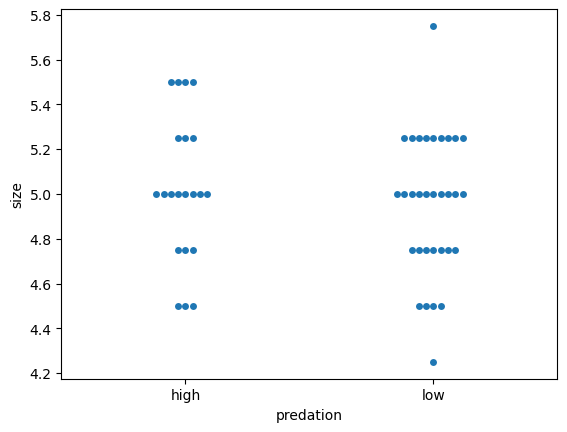

In [3]:
sns.swarmplot(x='predation', y='size', data=ladybirds);

Ladybird sizes vary between about 4.2 mm and 5.8 mm. There doesn't seem to be much difference in the distribution of ladybird sizes in the two cemeteries. The sample means and the spread of the values look roughly the same.

### Sample means and difference in sample means

Let's calculate the ladybird size sample means in the two cemeteries. We'll also calculate the difference in the sample means as this is what we are interested in.

In [4]:
means = ladybirds.groupby('predation')['size'].mean()
print(means.round(3))
print()
print(f"difference = {means['low'] - means['high']:.3f} mm")

predation
high    5.024
low     4.953
Name: size, dtype: float64

difference = -0.071 mm


The sample mean ladybird size in the high predation cemetery is 5.024 mm and 4.953 mm in the low predation cemetery. That's a difference of 0.071 mm. 

### Null hypothesis significance testing revisited

Remember from last year that we are not particularly interested in the two samples of ladybirds you collected. Instead, we are interested in the two populations of ladybirds from which these samples were taken. This is the basis of inferential statistics. Inference is the drawing of conclusions about populations using random samples taken from them.

What we want to know is whether the **population mean** ladybird sizes in the two cemeteries are the same or different. 

We formulate two statistical hypothesis:
- The null hypothesis, $H_0$, states that the two population means are the same. Or, equivalently, that the difference in the populations means is zero.
- The alternative hypothesis, $H_A$, states that they are different. Or, equivalently, that the difference in the populations means is not zero.

We cannot know that actual population means because we cannot measure the size of every single ladybird in the two cemeteries. But their estimates are equal to the sample means; 5.024 mm for high predation and 4.953 mm for low predation. And the estimated difference in the population means is 0.071 mm.

We have two possibilities. 1) Either there is no difference in the population means ($H_0$ is true and $H_A$ is false), or 2) there is a real difference in the means ($H_A$ is true and $H_0$ is false). Ideally we would like to prove which one of these possibilities is actually true. But proof is too strong a word and is practically never possible. Instead we want to provide evidence in support of one over the other; which is not quite as strong as proof.

The method you've learned for doing this is called null hypothesis significance testing, or NHST for short. We're going to do NHST again but in a slightly different way.

NHST challenges the null hypothesis with the data you collected. In other words, we examine if the observed difference in the sample mean ladybird sizes of 0.071 mm is consistent with the population means being equal ($H_0$ true). By "consistent" we mean, if we were to repeatedly take pairs of random samples from both cemeteries and calculate the difference in their means, how often would a difference of at least 0.071 mm occur, assuming the null hypothesis were true? If it occurs quite often then it is consistent with the null hypothesis, if it hardly ever occurs then it is inconsistent with the null hypothesis.

On the one hand, when an observed difference (such as 0.071 mm) is **consistent** with the null hypothesis of no difference, we say that the observed difference is **not-significantly different from zero** or **there is no significant effect**. And we fail to reject the null hypothesis.

On the other hand, when an observed difference (such as 0.071 mm) is **inconsistent** with the null hypothesis of no difference, we say that the observed difference is **significantly different from zero** or **there is a significant effect**. And we reject the null hypothesis.

### Modelling data

Statisticians have developed a method called **linear modelling** that allows us to estimate population means and test hypotheses with NHST in a single step. We first have to write down a model for the data. The model states how the variables we have measured could be related. In this example we have only two variables; "predation" and "size", so our model will be simple. For more complex datasets, like the project datasets you are using in this course, the models can be quite complicated. But let's start simply. 

Our simple model states that ladybird size is related to predation rate. The model is written as a formula that the computer can understand. However, the formula is not quite like ones you've seen before such as that for a straight line $y=mx+c$. The formula for our model is written like this

    size ~ predation

The squiggle `~` (also called tilde) means "is related to", so the formula reads "ladybird size is related to predation rate". In this formula the response variable "size" appears on the left of the tilde and the explanatory variable "predation" appears on the right.

Of course mean ladybird size will be related to other things such as aphid availability (two-spot ladybirds eat aphids). But we haven't measured these other things so they can't appear in our model. 

We get the computer to fit our model to the data. As we'll see, the fit of the model allows us to test our null hypothesis using NHST.

### Code and fit the model

Let's code the model formula, fit the model to the data and output a summary of the fit. We use a method called "ordinary least squares" (ols for short). You may have come across this at school. We are not going into the details of how ordinary least squares works. All we're interested in is its output.

In [5]:
# the model formula is coded as as a string
formula = 'size ~ predation'

# fit the model to the data
fit = ols(formula, ladybirds).fit()

# output summary table of the model fit
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.0238,0.069,72.323,0.000,4.884,5.163
predation[T.low],-0.0707,0.089,-0.791,0.433,-0.250,0.109


### Interpret the summary of the model fit

What does this table mean?

Let's start with the first column called "coef" (which stands for "coefficient"). This has two values, 5.0238 for the thing called `Intercept` and -0.071 for the thing called `predation[T.low]`. Compare these values to the estimated "high" mean ladybird size and the estimated difference between the "high" and "low" mean ladybird sizes in this figure.
 
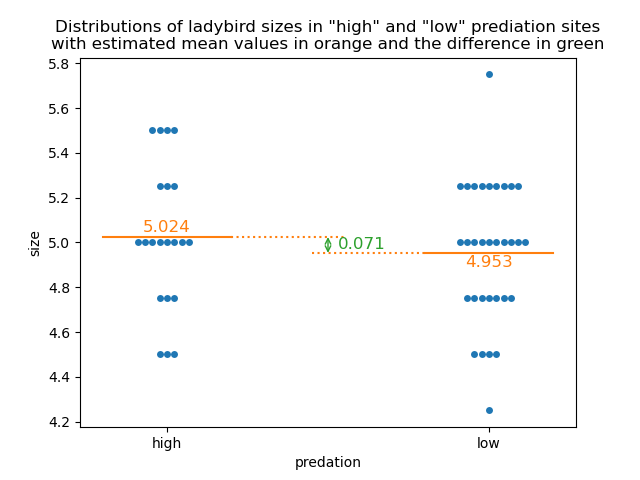

They are the same. This is not a coincidence. What `ols` has done is used "high" predation as a reference level called `Intercept` and compared it to the "low" predation level called `predation[T.low]`. By default `ols` choses the level whose name comes first alphabetically as the reference level. As we'll see later, we can tell `ols` which level to use as the reference level. But for now we'll just use the default behaviour of `ols`.

Each row in the table is a null hypothesis significance test on whether the value of its "coef" is significantly different from zero. So the first row asks "Is the "high" predation mean value of 5.0238 mm significantly different from zero?" and the second row asks "Is the difference of -0.071 mm between the "high" and "low" means significantly different from zero?".

The `Intercept` significance test is a bit meaningless. We know that ladybirds must have a size greater than zero otherwise they wouldn't exist. So we can ignore the `Intercept` test; we're not testing the null hypothesis of whether ladybirds have a mean size of zero mm. (Although the `Intercept` test is meaningless in this example, it may have meaning in other cases, as we will see.)

What we are interested in though is the significance test of whether the observed difference in mean ladybird sizes between the "low" and "high" predation levels of 0.071 mm is significantly different from zero. That is our null hypothesis $H_0$ which we formulated above.

If you remember from last year, and the recap on Monday, we use something called the *t*-test statistic to compare two population means. We won't go into the details here of why that is so because it is complicated and actually unnecessary. All we care about here is how probable the *t*-statistic is if the null hypothesis were true. This is called the *p*-value. The *p*-value is given in the "P>|t|" column. 

Looking at the table we see that *t* is 0.791 (we can ignore the negative sign; *t* is negative because the difference is negative, and we don't care whether the difference is positive or negative). The probability of observing a *t*-statistic at least as high as 0.791 is 0.433 if the null hypothesis were true. Equivalently, we can say that the probability of observing a difference in ladybird sizes at least as high as 0.071 mm is 0.433 if the null hypothesis were true. 

The probability of 0.433 is quite likely, that's almost 50:50. In other words, if the null hypothesis were true and we kept on sampling ladybird sizes from "low" and "high" predation sites, we would expect to see a difference in ladybird sizes of at least 0.071 mm about 43.3% of the time.

Using the convention that when a *p*-value is greater than 0.05 we have a non-significant result, we cannot reject the null hypothesis that mean ladybird sizes are the same in low and high predation cemeteries. Or, put another way, we have insufficient evidence to support the hypothesis that mean ladybird sizes are different in low and high predation cemeteries.

The last two columns of the summary table give the 95% confidence intervals (or CI for short). Remember 95% CIs represent the precision with which we have estimated a population parameter.

The 95% CI for the "high" population mean is 4.88 mm to 5.16 mm. So quite precise, within 0.3 of a millimetre.

The 95% CI for the difference in population means is -0.250	mm to 0.109 mm. The key point here is that the 95% CI contains zero millimetres. Something that is not significantly different from zero will have a 95% CI that contains zero. Conversely, something that is significantly different from zero will have a 95% CI that does not contain zero.

### Report the outcome of the test

No significant difference was found in mean ladybird sizes between low and high predation cemeteries (*n* = 53, *t* = 0.79, *p* = 0.43). Therefore there is insufficient evidence to support the hypothesis that Harlequin ladybirds prefer to eat small two-spot ladybirds.

### Changing the reference level of the Intercept

I mentioned above that we can change which level `ols` uses as the reference level for `Intercept`. By default `ols` choses the level whose name comes first alphabetically as the reference level. "high" is the reference level because it comes before "low" alphabetically. To make "low" the reference level we have to change the model formula like so:

    size ~ C(predation, Treatment(reference=1))
    

In [6]:
formula = 'size ~ C(predation, Treatment(reference=1))'
fit = ols(formula, ladybirds).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.9531,0.056,88.021,0.000,4.840,5.066
"C(predation, Treatment(reference=1))[T.high]",0.0707,0.089,0.791,0.433,-0.109,0.250


`reference=0` sets "high" level to the reference level and `reference=1` sets "low" level to the reference level. 

Notice when "low" is the reference level, "coef" of `Intercept` is 4.95 mm; the estimated mean ladybird size of the low predation cemetery. Also the difference is now positive 0.071 mm because we are subtracting 4.95 mm from 5.02 mm, not the other way round when "high" was the reference level.

In this case it doesn't matter which reference level is used; the outcome is still the same: insufficient evidence for a difference in population mean ladybird sizes. However, sometimes it makes more sense to use a particular level as the reference level.